# Type of Machine Learning Algorithms:
1. Supervised --> There are separate input and output columns.(CHURN,FATEL DATASET) (MarkedUp data)

                   Methods For Training Models :- Simple,Multiple,Decision Tree,Random Forest,KNN,SVM
2. Unsupervised --> There are NO separate input and output columns.(ERP DATASET) (UnmarkedUp data)

                    Methods For Training Models :- Cluster,Hierarchical,Clustering Analysis
                    Eg: Recommendation System
3. Reinforcement (Not in our syllabus)

### PAC - Probably Approximately Correct:
- As close as possible to the true value (approximately) - Related Error  (it should be low ) - epsilon (maximum probability allowed error).
- 1 - epsilon --> accurary (if the probability is gerater than epsilon so it will reject)  P(Actual prediction XOR Model prediction) ≤ Epsilon.
- As frequently as possible (probably) - Related Probability (it should be high) - delta (probability of failure).
- 1 - delta --> confidence
- P(P(Actual prediction XOR Model prediction) ≤ Epsilon) > 1 - delta
### Confusion Matrix:
- True Positive --> A person who is actually pregnant (positive) and classified as pregnant (positive). This is called TRUE POSITIVE (TP).
- True Negative --> A person who is actually not pregnant (negative) and classified as not pregnant (negative). This is called TRUE NEGATIVE (TN).
  
- False Positive --> A person who is actually not pregnant (negative) and classified as pregnant (positive). This is called FALSE POSITIVE (FP).
- False Negative --> A person who is actually pregnant (positive) and classified as not pregnant (negative). This is called FALSE NEGATIVE (FN).
- Precision (P) --> TP / (TP+FP) -----> from Company Point of view.
- Recall (R) --> TP / (TP+FN)  ----> From CDAC Point of view.
- F1 Score ---> 2 * P * R / P + R (Harmonic Mean of Precision and Recall)
##### If any prediction falls unnder False then it is error.
- P(C xor M) - P(FP + FN) = O.25 <= epsilon
- P(P(C xor M)) = P(e <= epsilon) >= 1 - delta

## Underfitting
- Bias:- Inability of model to reconize the pattern from the data (The diff between )
- When Bias is High and Variance is high or low then it is consider as Underfitting.
- When we Key Word over simplified then there is Underfitting
- I don't follow teacher and only do of my own 

## Overfitting
- When the Bias is Low and Variance is High then it is consider as Overfitting.
- Key word - over complication of the model.
- Eg: I over follow teacher 

- Vertical Split X and Y where X = perdictors and Y = Response or output 

## Simple Linear Regression
- Power of variable = 1
- Response Should be continuous
- 1 Predictor Continuous
- y = mx + c
## Multiple Linear Regression
- When there are multiple variable the we use MLR power of variabe > 1
- Response Should be continuous
- It can have more than 1 predector continuous
- y = m1x1 + m2x2 + .... + c

### Co-Variance:
- correlation coefficient tells the strenght of the relationship between entities
- co-variance tells only direction of relationship between variables

In [329]:
import pandas as pd
import numpy as np
import os
from numpy import random
import scipy 
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm ,t
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
from random import choice
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion  as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
os.chdir(r"D:\R Programing")

In [168]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [169]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='stackloss')

In [170]:
df.head()

,AirFlow,WaterTemp,AcidConc,StackLoss
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


In [171]:
df.corr()

,AirFlow,WaterTemp,AcidConc,StackLoss
AirFlow,1.000000,0.781852,0.500143,0.919663
WaterTemp,0.781852,1.000000,0.390940,0.875504
AcidConc,0.500143,0.390940,1.000000,0.399830
StackLoss,0.919663,0.875504,0.399830,1.000000


In [172]:
np.cov(df['AirFlow'],df['WaterTemp'])

array([[84.05714286, 22.65714286],
       [22.65714286,  9.99047619]])

- 84.05714286 =  co-variance airflow with itself
- 22.65714286 = co-variance of airflow with waterflow
- 9.99047619 = co-variance of waterflow with itself
- co-variance of x1 is almost equal to variance of x1

In [173]:
np.var(df['AirFlow'])

np.float64(80.05442176870748)

In [174]:
np.var(df['WaterTemp'])

np.float64(9.514739229024945)

In [175]:
np.corrcoef(df['AirFlow'],df['WaterTemp'])

array([[1.        , 0.78185233],
       [0.78185233, 1.        ]])

In [176]:
df1 = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='faithful')

In [177]:
df1.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


<Axes: xlabel='waiting', ylabel='eruptions'>

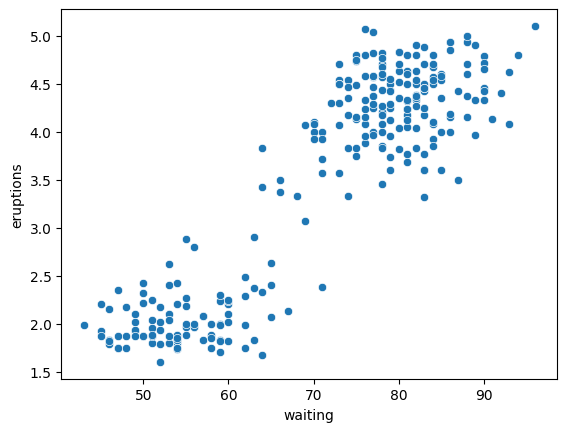

In [178]:
sns.scatterplot(x=df1['waiting'],y=df1['eruptions'])

In [179]:
np.corrcoef(df1['waiting'],df1['eruptions'])

array([[1.        , 0.90081117],
       [0.90081117, 1.        ]])

In [180]:
x_train = df1.waiting
y_train = df1.eruptions

In [181]:
x_train = sm.add_constant(x_train,prepend=False)

In [182]:
x_train.head()

,waiting,const
0,79,1.0
1,54,1.0
2,74,1.0
3,62,1.0
4,85,1.0


## OLS (Ordinary Least Squared)
- ***Residuals*** --> Diff between Predicted values and actual value.
- all the residuals should be normally distributed.
- Residuals are randomly distributed with respect ot fitted values.
- The variance of residuals with respect to fitted values should be constant.
- Anderson-Darling Test (Used for see whether data is normal distributed) --> Ho = data is not falling in normal distribution
- 68.3% of data should fall under +-1 std dev
- 99.7% should fall under +-3 std dev
- Mean,Median,Mode will be very close to 0.
- Eg. If mean = 60 and std dev = 5 so (45 - 55) is +-1 so 68.3% fall under this range and (45 - 75) +-3 so 99.73 fall under this range.

In [183]:
mod1 = sm.OLS(y_train,x_train).fit() ## OLS --> Ordinary least Squared
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          8.13e-100
Time:                        14:46:32   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waiting        0.0756      0.002     34.089      0.0

- We have calculated to get least square value for 'm' and 'c' for the equation
- eruptions = 0.0756* waiting - 1.8740 (y = mx + c)
- As the null hypothesis is m = 0 so it is statistically significant, compared to 0.0756 so waiting is not dependant on eruptions
- R-Squared --> explain the variations from the model (Eg. If the r-squared is 0.9, it sugggest 90% is explained and 10% is not explained)

In [184]:
0.90081117**2 ## R-squared = coefficent of determination  (it is square of correlation coefficent) (only in linear regression)

0.8114607639967689

- Adjusted R-Squared charges the penalty for the number of perdictors ised in the model 
- Has the no of perdictors increase, the diff between r-squared and adjusted r-squared will also increase
- F-statistic: 1162. ---> t-statistic
- Prob (F-statistic):   8.13e-100 ---> P-value
- As Null hypothesis is rejected so our model is useful so we can take decision for it
- *response* is not affected by *predictor*

In [185]:
x_train, x_test, y_train, y_test = train_test_split(df1.waiting,df1.eruptions, test_size=0.2,random_state=20)
## train_test_split(input column, output column, % of test sample)

In [186]:
x_train.head()

58     77
184    51
15     52
103    83
81     82
Name: waiting, dtype: int64

In [187]:
x_train.shape

(217,)

In [188]:
272*0.8

217.60000000000002

In [189]:
y_train.head()

58     4.567
184    2.033
15     2.167
103    4.500
81     4.333
Name: eruptions, dtype: float64

In [190]:
x_test.head()

72     79
132    56
129    90
29     79
87     80
Name: waiting, dtype: int64

In [191]:
y_test.head()

72     4.500
132    2.800
129    4.650
29     4.433
87     4.517
Name: eruptions, dtype: float64

In [192]:
x_train = sm.add_constant(x_train,prepend=False)

In [193]:
mod2 = sm.OLS(y_train, x_train).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     871.7
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.37e-77
Time:                        14:46:33   Log-Likelihood:                -160.39
No. Observations:                 217   AIC:                             324.8
Df Residuals:                     215   BIC:                             331.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waiting        0.0759      0.003     29.525      0.0

- R-squared value is only 0.802 because the best fit line does not cover all the points, so it means all the points are not clustering around best fit line.

In [194]:
x_test = sm.add_constant(x_test,prepend=False)
y_pred = mod2.predict(x_test)

In [195]:
y_pred.head()

72     4.083201
132    2.337782
129    4.917967
29     4.083201
87     4.159089
dtype: float64

In [196]:
y_test.head()

72     4.500
132    2.800
129    4.650
29     4.433
87     4.517
Name: eruptions, dtype: float64

In [197]:
df.head()

,AirFlow,WaterTemp,AcidConc,StackLoss
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


## Multiple Linear Regression

- There will be multiple predictor and one response 
- response must be continuous.

In [198]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("StackLoss",axis=1),df.StackLoss, test_size=0.2,random_state=20)


In [199]:
x_test.head()

,AirFlow,WaterTemp,AcidConc
16,50,19,72
19,56,20,82
18,50,20,80
4,62,22,87
1,80,27,88


In [200]:
x_train = sm.add_constant(x_train,prepend=False)

In [201]:
mod1 = sm.OLS(y_train,x_train).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:              StackLoss   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     33.46
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           4.14e-06
Time:                        14:46:33   Log-Likelihood:                -41.238
No. Observations:                  16   AIC:                             90.48
Df Residuals:                      12   BIC:                             93.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AirFlow        0.7337      0.169      4.346      0.0

C:\Users\viraj narayan shirke\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


- If the number of predictor increases the diff between them will increase and the value of adjusted R-Squared will decreases.

In [202]:
x_test = sm.add_constant(x_test,prepend=False)

In [203]:
y_pred = mod1.predict(x_test)

In [204]:
df.shape

(21, 4)

In [205]:
x_train.shape

(16, 4)

## Categorical Regression

- No. of Dummy column = No. of levels - 1
- Reference Event --> gives the removed column in above


In [206]:
df3 = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='salaries')

In [207]:
df3.head()

,rank,discipline,yrs_phd,yrs_service,gender,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [208]:
df3 = df3[['gender','yrs_service','salary']]

In [209]:
df3.head()

,gender,yrs_service,salary
0,Male,18,139750
1,Male,16,173200
2,Male,3,79750
3,Male,39,115000
4,Male,41,141500


In [210]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       397 non-null    object
 1   yrs_service  397 non-null    int64 
 2   salary       397 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.4+ KB


In [211]:
df3.gender.value_counts()

gender
Male      358
Female     39
Name: count, dtype: int64

In [212]:
#1. Generate the dummy columns 
gender_dum = pd.get_dummies(df3.gender,drop_first=True)

- drop_first=True --> it will make dummies of first alphabetically letter as refrence event
- The level which has been taken will not appear in the coefficient
- It is also called as  **One-Hot Encodinng**.

In [213]:
gender_dum['Male'] = gender_dum['Male'].astype(int)

In [214]:
gender_dum.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [215]:
#2. Remove the original column
df3 = df3.drop('gender',axis=1)

In [216]:
#3. Append the dummy column(s) to the dataset
df3 = pd.concat([df3,gender_dum],axis=1)

In [217]:
df3.head()

,yrs_service,salary,Male
0,18,139750,1
1,16,173200,1
2,3,79750,1
3,39,115000,1
4,41,141500,1


In [218]:
# 4. splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(df3.drop("salary",axis=1),df3.salary, test_size=0.2,random_state=20)

In [219]:
# 5. add the constant term
x_train = sm.add_constant(x_train,prepend=False)

In [220]:
# 6. create the term
mod3 = sm.OLS(y_train,x_train).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     21.52
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.75e-09
Time:                        14:46:33   Log-Likelihood:                -3698.4
No. Observations:                 317   AIC:                             7403.
Df Residuals:                     314   BIC:                             7414.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yrs_service   701.6382    125.946      5.571      

- Male --> Target event
- Female --> reference event
- Ho(sal) --> coeff of yr_service = 0
- Ho(gender) --> The change in response when the variable changes from the reference variable('Female') to target variable('Male') is equal to 0.
- Ho ---> Change in response when the factor or variable changes from reference event to target event = 0.
- As the t-value gets higher. it will be more significant on the salary.

In [221]:
df3 = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='salaries')

In [222]:
df3.head()

,rank,discipline,yrs_phd,yrs_service,gender,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [223]:
df3 = df3[['rank','yrs_service','salary']]

In [224]:
df3.head()

,rank,yrs_service,salary
0,Prof,18,139750
1,Prof,16,173200
2,AsstProf,3,79750
3,Prof,39,115000
4,Prof,41,141500


In [225]:
df3['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [226]:
rank_dum = pd.get_dummies(df3['rank'],drop_first=True).astype(int)

In [227]:
df3 = df3.drop('rank',axis=1)

In [228]:
df3 = pd.concat([df3,rank_dum],axis=1)

In [229]:
df3.head()

,yrs_service,salary,AsstProf,Prof
0,18,139750,0,1
1,16,173200,0,1
2,3,79750,1,0
3,39,115000,0,1
4,41,141500,0,1


In [230]:
x_train, x_test, y_train, y_test = train_test_split(df3.drop("salary",axis=1),df3.salary, test_size=0.2,random_state=20)

In [231]:
x_train = sm.add_constant(x_train,prepend=False)

In [232]:
mod2 = sm.OLS(y_train,x_train).fit()

In [233]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     63.71
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           3.54e-32
Time:                        14:46:33   Log-Likelihood:                -3643.3
No. Observations:                 317   AIC:                             7295.
Df Residuals:                     313   BIC:                             7310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yrs_service  -161.8155    131.085     -1.234      

- m2 = change in salary when there is change in rank i.e assoicateprof to asstprof 
- m3 = change in salary when there is change in rank i.e assoicateprof to prof
- Ho(m3) = 0.0
- decision = R
- Conclusion = m3!=0
- so is signifcant so the salary will increase by 350000 by keeping other factor constant
- When assotprof do not any exp the salary will increase by 95000 (constant)

- assoc --> 95000
- assic --> 95000 - 13000 = 82000
- prof --> 95000 + 30000 = 125000

## Binary Logistic Regresssion
- Now the response is categorical
- so it can be:
- ***Ordinal*** (Multi categories, with logical order)
- ***Nominal*** (Multi categories, without logical order)
- ***Binary***  (0, 1)

Multicollinearity

In [234]:
df_car = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='mtcars')

In [235]:
df_car.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [236]:
df_car.shape

(32, 11)

In [237]:
df_car = df_car[['hp','wt','am']]

In [238]:
x_train = df_car.drop('am',axis=1)

In [239]:
y_train = df_car.am

In [240]:
x_train = sm.add_constant(x_train,prepend=False)

In [241]:
mod2 = sm.Logit(y_train ,x_train).fit()
print(mod2.summary())

Optimization terminated successfully.
         Current function value: 0.157174
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     am   No. Observations:                   32
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 Dec 2024   Pseudo R-squ.:                  0.7673
Time:                        14:46:34   Log-Likelihood:                -5.0296
converged:                       True   LL-Null:                       -21.615
Covariance Type:            nonrobust   LLR p-value:                 6.267e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hp             0.0363      0.018      2.044      0.041       0.001       0.071
wt            -8.0835      3.

- 0 --> Reference Event
- 1 --> Target Event 

- Ho(hp) --> hp does not influence choice between 0 & 1
- Ho(wt) --> wt does not influence choice between 0 & 1
  

- Conclusion --> hp influencses the choice between 0 & 1
- When hp increase the am will move away from reference
- As the hp increaseing the probability of getting '1'

- Conclusion --> wt has influence on the choice between 0 & 1
- so when wt decreases the probability of getting towards 1 increases

- Odd Ratio --> p/(1-p)
- odds ratio (OR) is a measure of the association between an exposure and an outcome.

In [242]:
np.log(0.7/(1-0.7))

np.float64(0.8472978603872034)

In [243]:
np.log(0.3/(1-0.3))

np.float64(-0.8472978603872036)

In [244]:
x_train.head()

,hp,wt,const
0,110,2.620,1.0
1,110,2.875,1.0
2,93,2.320,1.0
3,110,3.215,1.0
4,175,3.440,1.0


In [245]:
mydata = pd.DataFrame([[90,2.5,1],[100,2.5,1],[110,2.5,1]],columns=x_train.columns)

In [246]:
mydata

,hp,wt,const
0,90,2.5,1
1,100,2.5,1
2,110,2.5,1


In [247]:
mod2.predict(mydata) ## this will give the prob of getting towards 1

0    0.872207
1    0.907474
2    0.933747
dtype: float64

In [248]:
(np.log(0.907474/(1-0.907474)) - np.log(0.872207/(1-0.872207))) / 10 ## this will give the change in odd ratio

np.float64(0.03625602157890166)

In [249]:
(np.log(0.933747/(1-0.933747)) - np.log(0.907474/(1-0.907474))) / 10 

np.float64(0.03625495472432383)

In [250]:
mydata = pd.DataFrame([[90,3.1,1],[90,3.2,1],[90,3.3,1]],columns=x_train.columns)

In [251]:
mod2.predict(mydata)

0    0.050716
1    0.023252
2    0.010496
dtype: float64

In [252]:
(np.log(0.023252/(1-0.023252)) - np.log(0.050716/(1-0.050716))) / 0.1

np.float64(-8.08370962931494)

- Precision ---> The ratio of the number of correct predictions to the total number of predictions by model.
- Formula ---> TP / TP + FP (for positive) or TN / TN + FN (for negative)
- Recall ---> The ratio of the number of correct predictions to the total number of actual relevant objects by actual data.
- Formula ---> TP / TP + FN (for postive) or TN / TN + FP (for negative)

In [253]:
df_diabetes = pd.read_excel("CDAC_DataBook.xlsx",sheet_name='diabetes')

In [254]:
df_diabetes.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DietType,Outcome
0,148,72,35,0,33.6,0.63,50,1,1
1,85,66,29,0,26.6,0.35,31,2,0
2,183,64,0,0,23.3,0.67,32,1,1
3,89,66,23,94,28.1,0.17,21,1,0
4,137,40,35,168,43.1,2.29,33,1,1


In [255]:
df_diabetes = df_diabetes[['Glucose','DietType','Outcome']]

In [256]:
diet_dum = pd.get_dummies(df_diabetes['DietType'],drop_first=True).astype(int)

In [257]:
df_diabetes = df_diabetes.drop('DietType',axis=1)

In [258]:
df_diabetes = pd.concat([df_diabetes,diet_dum],axis=1)

In [259]:
df_diabetes.head()

,Glucose,Outcome,2,3
0,148,1,0,0
1,85,0,1,0
2,183,1,0,0
3,89,0,0,0
4,137,1,0,0


In [260]:
x_train, x_test, y_train, y_test = train_test_split(df_diabetes.drop("Outcome",axis=1),df_diabetes.Outcome, test_size=0.2,random_state=20)


In [261]:
x_train = sm.add_constant(x_train,prepend=False)


In [262]:
mod1 = sm.Logit(y_train,x_train).fit()
print(mod1.summary())

Optimization terminated successfully.
         Current function value: 0.342252
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      610
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Dec 2024   Pseudo R-squ.:                  0.4715
Time:                        14:46:34   Log-Likelihood:                -210.14
converged:                       True   LL-Null:                       -397.59
Covariance Type:            nonrobust   LLR p-value:                 6.038e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Glucose        0.0392      0.005      8.507      0.000       0.030       0.048
2             -3.8331      0.

- m1 = Glucsoe has no effect on Outcome coeff of glucose == 0
- m2 = When diettype from 1 to 2 it does not influence Outcome
- m3 = When diettype from 1 to 3 it does not influence Outcome

In [263]:
x_test = sm.add_constant(x_test)
y_pred = np.round(mod1.predict(x_test),0)

C:\Users\viraj narayan shirke\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [264]:
confusion_matrix(y_test,y_pred)

array([[101,   0],
       [ 53,   0]])

In [265]:
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       101
           1       0.00      0.00      0.00        53

    accuracy                           0.66       154
   macro avg       0.33      0.50      0.40       154
weighted avg       0.43      0.66      0.52       154



C:\Users\viraj narayan shirke\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\viraj narayan shirke\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\viraj narayan shirke\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [266]:
89 + 12 # this count is the people does not have diatebes

101

In [267]:
9 + 44 # This  count is the people  have diabetes

53

In [268]:
44 + 12 # Predicted this are having diabetes

56

## MultiCollinearity

In [269]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='VIF')

In [270]:
df.head()

,Education,Region,Gender,Exp,Union,Wage,Age,Race,Occupation,Sector,Married
0,9,0,1,42,0,4.95,57,3,6,1,1
1,12,0,0,1,0,6.67,19,3,6,1,0
2,12,0,0,4,0,4.00,22,3,6,0,0
3,12,0,0,17,0,7.50,35,3,6,0,1
4,13,0,0,9,1,13.07,28,3,6,0,0


In [271]:
df = df[['Exp','Age','Education','Married','Wage']]

In [272]:
df.head()

,Exp,Age,Education,Married,Wage
0,42,57,9,1,4.95
1,1,19,12,0,6.67
2,4,22,12,0,4.00
3,17,35,12,1,7.50
4,9,28,13,0,13.07


In [273]:
married_dum = pd.get_dummies(df.Married,drop_first=True).astype(int)

In [274]:
df = df.drop('Married',axis=1)

In [275]:
df.head()

,Exp,Age,Education,Wage
0,42,57,9,4.95
1,1,19,12,6.67
2,4,22,12,4.00
3,17,35,12,7.50
4,9,28,13,13.07


In [276]:
df = pd.concat([df,married_dum],axis=1)

In [277]:
df.head()

,Exp,Age,Education,Wage,1
0,42,57,9,4.95,1
1,1,19,12,6.67,0
2,4,22,12,4.00,0
3,17,35,12,7.50,1
4,9,28,13,13.07,0


In [278]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Wage",axis=1),df.Wage, test_size=0.2,random_state=20)

In [279]:
x_train = sm.add_constant(x_train,prepend=False)

In [280]:
mod1 = sm.OLS(y_train,x_train).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     50.15
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           9.69e-28
Time:                        14:46:35   Log-Likelihood:                -1218.2
No. Observations:                 426   AIC:                             2444.
Df Residuals:                     422   BIC:                             2461.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Exp            1.0452      0.201      5.204      0.0

In [281]:
df2 = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='VIF')

In [282]:
df2 = df2[['Married','Education','Wage']]

In [283]:
married_dum1 = pd.get_dummies(df2.Married,drop_first=True).astype(int)

In [284]:
df2 = df2.drop('Married',axis=1)

In [285]:
df2 = pd.concat([df2,married_dum1],axis=1)

In [286]:
x_train, x_test, y_train, y_test = train_test_split(df2.drop("Wage",axis=1),df2.Wage, test_size=0.2,random_state=20)

In [287]:
x_train = sm.add_constant(x_train,prepend=False)

In [288]:
mod1 = sm.OLS(y_train,x_train).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     50.47
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           2.20e-20
Time:                        14:46:35   Log-Likelihood:                -1237.6
No. Observations:                 426   AIC:                             2481.
Df Residuals:                     423   BIC:                             2493.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Education      0.7850      0.081      9.710      0.0

In [289]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='VIF')
df = df[['Exp','Age','Education','Married','Wage']]
married_dum = pd.get_dummies(df.Married,drop_first=True).astype(int)
df = df.drop('Married',axis=1)
df = pd.concat([df,married_dum],axis=1)
x_train, x_test, y_train, y_test = train_test_split(df.drop("Wage",axis=1),df.Wage, test_size=0.2,random_state=20)
x_train = sm.add_constant(x_train,prepend=False)
mod1 = sm.OLS(y_train,x_train).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     50.15
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           9.69e-28
Time:                        14:46:35   Log-Likelihood:                -1218.2
No. Observations:                 426   AIC:                             2444.
Df Residuals:                     422   BIC:                             2461.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Exp            1.0452      0.201      5.204      0.0

In [290]:
for i in range(df.shape[1]):
    print('columns:',i,'has VIF factor as',variance_inflation_factor(df.values,i))

columns: 0 has VIF factor as 548.4369250348835
columns: 1 has VIF factor as 1580.354317705464
columns: 2 has VIF factor as 370.66061687999195
columns: 3 has VIF factor as 5.134790611803771
columns: 4 has VIF factor as 3.155700169364595


In [291]:
for i in range(df2.shape[1]):
    print('columns:',i,'has VIF factor as',variance_inflation_factor(df2.values,i))

columns: 0 has VIF factor as 5.948866949534532
columns: 1 has VIF factor as 4.838813039801811
columns: 2 has VIF factor as 2.6886559440131763


---------


## Nominal Logistic Regression

In [292]:
df_nom = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='nominal')

In [293]:
df_nom.head()

,ses,write,math,prog
0,1,35,41,1
1,2,33,41,2
2,3,39,44,3
3,1,37,42,1
4,2,31,40,2


In [294]:
df_nom = df_nom.drop('write',axis=1)

In [295]:
ses_dum = pd.get_dummies(df_nom['ses'],drop_first=True).astype(int)

In [296]:
df_nom = df_nom.drop('ses',axis=1)

In [297]:
df_nom = pd.concat([df_nom,ses_dum],axis=1)

In [298]:
df_nom.head()

,math,prog,2,3
0,41,1,0,0
1,41,2,1,0
2,44,3,0,1
3,42,1,0,0
4,40,2,1,0


In [299]:
x_train, x_test, y_train, y_test = train_test_split(df_nom.drop("prog",axis=1),df_nom.prog, test_size=0.2,random_state=20)


In [300]:
x_train = sm.add_constant(x_train,prepend=False)

In [301]:
mod1 = sm.MNLogit(y_train,x_train).fit()
print(mod1.summary())

Optimization terminated successfully.
         Current function value: 0.653667
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                   prog   No. Observations:                  160
Model:                        MNLogit   Df Residuals:                      152
Method:                           MLE   Df Model:                            6
Date:                Sat, 21 Dec 2024   Pseudo R-squ.:                  0.3687
Time:                        14:46:35   Log-Likelihood:                -104.59
converged:                       True   LL-Null:                       -165.68
Covariance Type:            nonrobust   LLR p-value:                 5.678e-24
    prog=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
math           0.0112      0.036      0.312      0.755      -0.059       0.082
2              3.2174      0.

- prog 1 is refrence event
- ses 1 is refrence event


In [302]:
mydata = pd.DataFrame([[70,0,0,1],[70,1,0,1],[70,0,1,1]])
mod1.predict(mydata)

,0,1,2
0,0.478186,0.358071,0.163743
1,0.010134,0.189431,0.800436
2,0.003176,0.028174,0.968650


In [303]:
mydata = pd.DataFrame([[60,0,0,1],[70,0,0,1],[85,0,0,1]])
mod1.predict(mydata)

,0,1,2
0,0.563490,0.377273,0.059237
1,0.478186,0.358071,0.163743
2,0.256494,0.227172,0.516334


## Ordinal Logistic Regression
- In ordinal we don't need to add constant

In [304]:
df_ord = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='ordinal')

In [305]:
region_dum = pd.get_dummies(df_ord.Region,drop_first=True,prefix='region').astype(int)

In [306]:
df_ord = df_ord.drop('Region',axis=1)

In [307]:
df_ord = pd.concat([df_ord,region_dum],axis=1)

In [308]:
df_ord.head()

,Survival,ToxicLevel,region_2
0,1,62.0,0
1,1,46.0,1
2,2,48.5,0
3,3,32.0,1
4,2,63.5,0


In [309]:
x_train, x_test, y_train, y_test = train_test_split(df_ord.drop("Survival",axis=1),df_ord.Survival, test_size=0.2,random_state=20)


In [310]:
mod2 = OrderedModel(y_train,x_train).fit()
print(mod2.summary())

Optimization terminated successfully.
         Current function value: 0.844881
         Iterations: 190
         Function evaluations: 326
                             OrderedModel Results                             
Dep. Variable:               Survival   Log-Likelihood:                -49.003
Model:                   OrderedModel   AIC:                             106.0
Method:            Maximum Likelihood   BIC:                             114.2
Date:                Sat, 21 Dec 2024                                         
Time:                        14:46:36                                         
No. Observations:                  58                                         
Df Residuals:                      54                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

## Poission Regression
- when the variation in the counts is less.

In [317]:
df_poi = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='poisson')

In [313]:
df_poi.head()

,num_awards,prog,math
0,0,3,41
1,0,1,41
2,0,3,44
3,0,3,42
4,0,3,40


In [318]:
prog_dum = pd.get_dummies(df_poi.prog,prefix = 'prog',drop_first=True).astype(int)
df_poi = df_poi.drop('prog',axis=1)
df_poi = pd.concat([df_poi,prog_dum],axis=1)

In [319]:
df_poi.head()

,num_awards,math,prog_2,prog_3
0,0,41,0,1
1,0,41,0,0
2,0,44,0,1
3,0,42,0,1
4,0,40,0,1


In [320]:
x_train, x_test, y_train, y_test = train_test_split(df_poi.drop("num_awards",axis=1),df_poi.num_awards, test_size=0.2,random_state=20)

In [321]:
x_train = sm.add_constant(x_train,prepend=False)

In [325]:
df_train = pd.concat([x_train,y_train],axis=1)

In [328]:
df_train.head()

,math,prog_2,prog_3,const,num_awards
152,51,1,0,1.0,0
67,49,1,0,1.0,0
133,57,1,0,1.0,0
59,54,0,0,1.0,0
63,40,0,1,1.0,1


In [326]:
mod1 = psn.from_formula('num_awards ~ math+prog_2 + prog_3',data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.871654
         Iterations 6


In [327]:
print(mod1.summary())

                          Poisson Regression Results                          
Dep. Variable:             num_awards   No. Observations:                  160
Model:                        Poisson   Df Residuals:                      156
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Dec 2024   Pseudo R-squ.:                  0.1865
Time:                        17:45:19   Log-Likelihood:                -139.46
converged:                       True   LL-Null:                       -171.44
Covariance Type:            nonrobust   LLR p-value:                 8.447e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0741      0.780     -6.503      0.000      -6.603      -3.545
math           0.0661      0.013      5.154      0.000       0.041       0.091
prog_2         1.1048      0.407      2.711      0.0

## Negative Binomial 
- When the variation in the counts is more.

In [349]:
df_neg = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='neg_bin')

In [331]:
df_neg.head()

,math,prog,daysabs
0,63,Academic,4
1,27,Academic,4
2,20,Academic,2
3,16,Academic,3
4,2,Academic,3


In [333]:
df_neg.prog.unique()

array(['Academic', 'Vocational', 'General'], dtype=object)

In [350]:
prog_dum = pd.get_dummies(df_neg.prog,prefix='Prog',drop_first=True).astype(int)

In [351]:
df_neg = df_neg.drop('prog',axis=1)

In [352]:
df_neg = pd.concat([df_neg,prog_dum],axis=1)

In [353]:
x= df_neg.drop('daysabs',axis=1)

In [354]:
y = df_neg.daysabs

In [355]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [356]:
x_train = sm.add_constant(x_train,prepend=False)

In [357]:
train_set = pd.concat([x_train,y_train],axis=1)

In [360]:
mod1 = ngb.from_formula('daysabs ~ math + Prog_General + Prog_Vocational', data=train_set).fit()
print(mod1.summary())

Optimization terminated successfully.
         Current function value: 2.819371
         Iterations: 19
         Function evaluations: 26
         Gradient evaluations: 26
                     NegativeBinomial Regression Results                      
Dep. Variable:                daysabs   No. Observations:                  251
Model:               NegativeBinomial   Df Residuals:                      247
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Dec 2024   Pseudo R-squ.:                 0.03229
Time:                        09:29:24   Log-Likelihood:                -707.66
converged:                       True   LL-Null:                       -731.28
Covariance Type:            nonrobust   LLR p-value:                 3.104e-10
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.2587  